# Logistic regression
用regression處理分類問題

```python
from sklearn.linear_model import LogisticRegression
```
C越小, 對regularization控制力越強  
C : float, default: 1.0  
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.  

C可視為$\lambda$的倒數


### Logistic Function
$y = \frac{1}{1+e^{-x}}$  , y介於0~1  
上下同乘$e^x$改可寫成$\frac{e^x}{1+e^{x}}$

### Hyperbolic tangent Function
$y = \frac{1-e^{-2x}}{1+e^{-2x}}$  , y介於0~1  


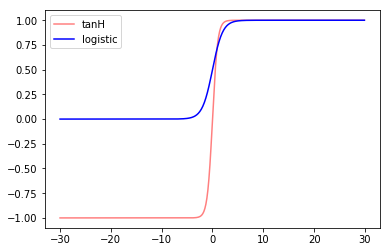

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import math

%matplotlib inline

x = np.arange(-30,30,0.1)
y1 = [1/(1+math.exp(-i)) for i in x]
y2 = [(1-math.exp(-2*i))/(1+math.exp(-2*i)) for i in x]
plt.plot(x,y2,c='r',alpha=0.5,label='tanH')
plt.plot(x,y1,c='b',label='logistic')
plt.legend()
plt.show()


### Loss Function  
$\hat y =  \frac{1}{1+e^{-(\theta_0+\theta_1 x)}} = \frac{1}{1+e^{-\theta^T X}} $  
找出最佳$\theta_0, \theta_1 $使得$ \hat y \approx y$    
<span style="color:red"> **對於二元分類問題** </span>  
$ P(y=1) = f(X) = \frac{1}{1+e^{-\theta^T X}}  $  
$ P(y=0) = 1-f(X) $  
對於$y=[0,1]$合併上兩式  
$ P(y) = f(X)^y*(1-f(X))^{1-y}$  
使用<span style="color:red"> Likelihood Function</span>求最大值  
假設有n筆samples  
<span style="color:green"> $L(\theta) = \prod_{i=1}^n p(y_i) =  \prod_{i=1}^n f(X_i)^{y_i}*(1-f(X_i))^{1-y_i}$</span>  
取log  
$\theta := arg~max_\theta L(\theta) = arg~max_\theta~log(L(\theta))$  
$ = arg~max_\theta~ \sum_{i=1}^n[y_i log(f(X_i))+(1-y_i)(log(1-f(X_i)))]$


### Logistic funxtion 微分
$g(x) = (1+e^{-x})^{-1}$  
$1-g(x) = e^{-x}(1+e^{-x})^{-1}$  

$g'(x) = -1(1+e^{-x})^{-2}e^{-x}(-1)$  
$~~~~~~~= (1+e^{-x})^{-1}*[(1+e^{-x})^{-1}* e^{-x}]$  
$~~~~~~~= g(x) * (1-g(x))$

$\theta := arg~max_\theta L(\theta) = arg~max_\theta~log(L(\theta))$  
$ = arg~max_\theta~ \sum_{i=1}^n[y_i log(f(X_i))+(1-y_i)(log(1-f(X_i)))]$  
令$l(\theta) = \sum_{i=1}^n y_i log(f(X_i))+(1-y_i)(log(1-f(X_i)))$ 微分=0 求極值  

已知 $f(X_i) = (1+e^{\theta^T X_i})^{-1} = g(\theta^TX_i)$  
 $l(\theta) = \sum_{i=1}^n y_i log(g(\theta^TX_i))+(1-y_i)(log(1-g(\theta^TX_i)))$

$l(\theta)$對某維度j的$\theta_j$偏微分  
$\frac{\partial l(\theta)}{\partial \theta_j}$,  
對於$ \frac{\partial y_i log(g(\theta^TX_i)}{\partial \theta_j}= \frac{\partial y_i log(g(\theta^TX_i)}{\partial log(g(\theta^TX_i)} * \frac{\partial log(g(\theta^TX_i)}{\partial g(\theta^TX_i)} * \frac{\partial g(\theta^TX_i)}{\partial \theta^TX_i}* \frac{\partial \theta^TX_i}{\partial \theta^j}$  
$= y_i * g(\theta^TX_i)^{-1}*[g(\theta^TX_i)*(1-g(\theta^TX_i))]*x_{ij}$  
$= y_i*(1-\hat y_i)*x_{ij}$  
$= y_i*x_{ij}-y_i\hat y_i*x_{ij}$

對於$ \frac{\partial (1-y_i)(log(1-g(\theta^TX_i)))}{\partial \theta_j}$  
$=\frac{\partial (1-y_i)(log(1-g(\theta^TX_i)))}{\partial log(1-g(\theta^TX_i))} * \frac{\partial log(1-g(\theta^TX_i))}{\partial (1-g(\theta^TX_i))} * \frac{\partial (1-g(\theta^TX_i))}{\partial g(\theta^TX_i)}*\frac{\partial g(\theta^TX_i)}{\partial \theta^TX_i}*\frac{\partial \theta^TX_i}{\partial \theta_j}$  
$= (1-y_i)*(1-g(\theta^TX_i))^{-1}*(-1)*[g(\theta^TX_i)*(1-g(\theta^TX_i))]*x_{ij}$  
$= -(1-y_i)\hat y_i x_{ij}$  
$= -\hat y_i * x_{ij} + y_i\hat y_i*x_{ij}$  

<span style="color:red"> $\frac{\partial l(\theta)}{\partial \theta_j} = \sum_{i=1}^n[x_{ij}*(y_i-\hat y_i)]$</span>  

Matrix Form:  
$\triangledown l(\theta)= (y-\hat y)^TX$

## Gradient Ascend find $\theta$ 
$L(\theta) $使最大值, 求$\theta$  
$\theta^{k+1} = \theta^{k} + \alpha (\triangledown l(\theta))^T$  

$\begin{aligned}
Repeat~until~converge: \\ 
&\hat y = \frac{1}{1+e^{-X\theta}}  \\
&\theta^{k+1} = \theta^{k} + \alpha X^T(y-\hat y)
\end{aligned}$

### Regularization to avoid overfitting
<span style="color:red"> $\theta := arg~max_\theta~ \sum_{i=1}^n[y_i log(f(X_i))+(1-y_i)(log(1-f(X_i))) - \frac{\lambda}{2}||\theta||^2]$</span>  
$\lambda$ 越高, 抑制overfitting越強  

$\frac{\partial l(\theta)}{\partial \theta_j} = \sum_{i=1}^n[x_{ij}*(y_i-\hat y_i) - \lambda \theta_j]$ 


### Multi-class logistic regression  
Two classes: $P(y=1) = \frac{e^{\theta^T X}}{1+e^{\theta^T X}}$  
Multiple classes (1,2,3...C): $P(y=c) = \frac{e^{\theta_c^T X}}{\sum_{j=1}^C 1+e^{\theta_j^T X}}$  
Called **Softmax function**  

Training: apply gradient to update all $\theta_c$  
Prediction: Find c that the maximizes = $\frac{e^{\theta_c^T X}}{\sum_{j=1}^C 1+e^{\theta_j^T X}}$  

### ROC Curve and AUC

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn import metrics
%matplotlib inline

from myfun import plot_decision_regions

In [2]:
data = load_iris()
# we only take the first two features.
X = data.data[:,:2]
y = data.target

/home/user/.local/share/virtualenvs/jupyter_project-H1uUnOrP/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/user/.local/share/virtualenvs/jupyter_project-H1uUnOrP/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please us

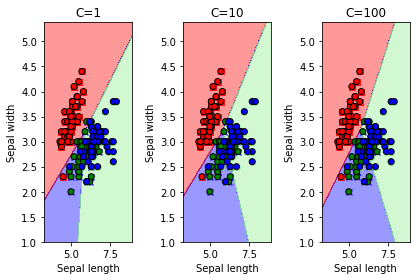

In [3]:
def different_c(drawflag,X,y,C):
    model = LogisticRegression(C=C)
    model.fit(X,y)
    plt.subplot(drawflag)
    plt.tight_layout()
    plot_decision_regions(X,y,model)
    colors='rgb'
    plt.scatter(X[:, 0], X[:, 1], c=[colors[y[i]] for i in range(len(y))], edgecolors='k', cmap=plt.cm.Paired)
    plt.title('C=%d'%C)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    
different_c(131,X,y,1)
different_c(132,X,y,10)
different_c(133,X,y,100)
plt.show()


# 'multinomial', 'ovr'


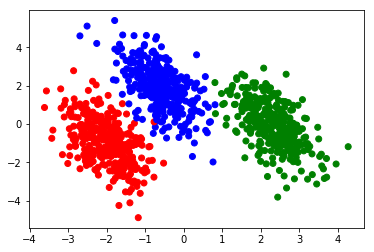

In [4]:
from sklearn.datasets import make_blobs

# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

color = "rbg"
color = [color[y[i]] for i in range(len(y))]
plt.scatter(X[:,0],X[:,1],c=color)
plt.show()

training score : 0.995 (multinomial)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


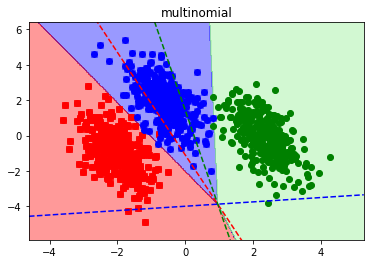

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


training score : 0.976 (ovr)


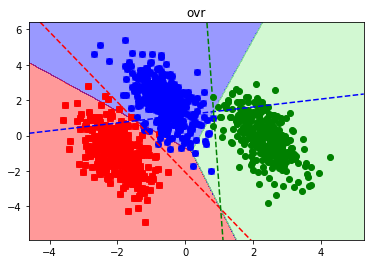

In [5]:
for multi_class_method in ['multinomial', 'ovr']:
    plt.figure()
    model = LogisticRegression(solver='sag',max_iter=100, random_state=42,multi_class=multi_class_method)
    model.fit(X, y)
    print("training score : %.3f (%s)" % (model.score(X, y), multi_class_method))
    plot_decision_regions(X,y,model)
    plt.title(multi_class_method)
    colors = "rbg"
    for i, color in zip(model.classes_, colors):
        #print('i=%d'%i+' c=%s'%color)
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired)

    # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = model.coef_
    intercept = model.intercept_
    #用intercept跟coef畫出hyperplan
    def plot_hyperplane(c, color):
        def line(x0):
            # ay = bx - c, y = (bx -c)/a
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
        plt.plot([xmin, xmax], [line(xmin), line(xmax)],
                 ls="--", color=color)

    for i, color in zip(model.classes_, colors):
        plot_hyperplane(i, color)


    
    plt.show()



In [6]:
model.coef_

array([[-4.41615534, -2.23077034],
       [-0.36796618,  1.64022091],
       [ 4.7027708 ,  0.18133443]])

In [7]:
model.intercept_

array([-4.61020975, -1.91396323, -4.17213317])

# Logistic Regression: Classification of Handwritten Digits
```python
from sklearn.datasets import load_digits
```

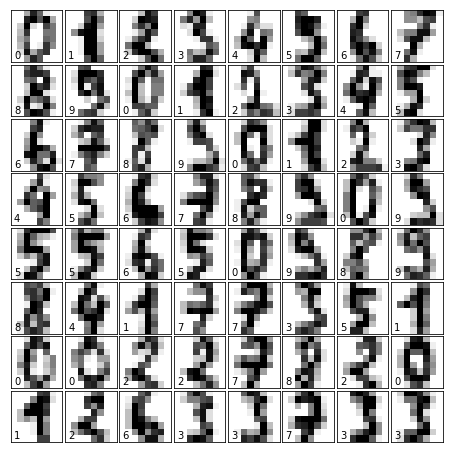

In [8]:
from sklearn.datasets import load_digits
digits = load_digits()
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [9]:
from sklearn.model_selection import train_test_split
# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=42)

In [10]:
model = LogisticRegression(solver='liblinear',max_iter=1000, random_state=42,multi_class='ovr', C=1e-2)
#model = LogisticRegression(solver='sag',max_iter=1000, random_state=42,multi_class='ovr', C=1.0)
#clf = LogisticRegression(C=1e-2,multi_class="ovr",solver='liblinear')
model.fit(X_train,y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

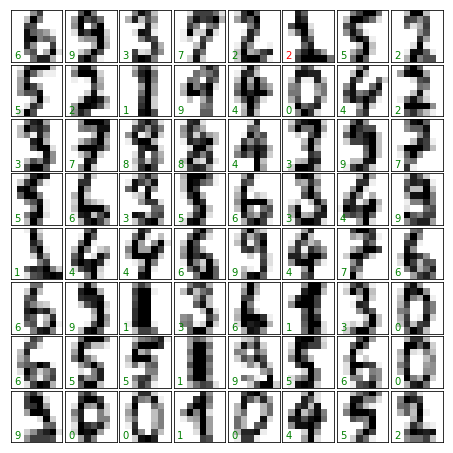

In [11]:
predicted = model.predict(X_test)

fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')
    
    # label the image with the target value
    if predicted[i] == y_test[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')

In [12]:
#印出accuracy, confusion matrix, f1-score, precision, recall等
#metrics.classification_report可以直接算出precision, recall, f1-score
print(metrics.classification_report(y_true=y_test, y_pred=predicted))

matches = (predicted == y_test)
print('accuracy1:%.3f'%(matches.sum() / float(len(matches))))
print("accuravy2=%f"%metrics.accuracy_score(y_true=y_test, y_pred=predicted))
print('accuracy3:%.2f'%model.score(X_test, y_test))
print("r2=%f"%metrics.r2_score(y_true=y_test, y_pred=predicted))
print("%s"%metrics.confusion_matrix(y_true=y_test, y_pred=predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        37
           2       0.95      1.00      0.97        38
           3       1.00      0.93      0.97        46
           4       1.00      0.98      0.99        55
           5       0.93      0.95      0.94        59
           6       0.98      0.98      0.98        45
           7       1.00      0.98      0.99        41
           8       0.90      0.95      0.92        38
           9       0.94      0.94      0.94        48

   micro avg       0.96      0.96      0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.97      0.96      0.96       450

accuracy1:0.964
accuravy2=0.964444
accuracy3:0.96
r2=0.948651
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 35  2  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  1  0  0  2  0]
 [ 0  1  0  0 54  0  0  0  0  0]
 [ 0  0  0  0 

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

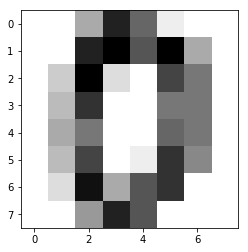

In [13]:
plt.imshow(digits.images[0], cmap=plt.cm.binary, interpolation='nearest')
digits.images[0]

# Imbalanced Datasets

In [35]:

# make 3-class dataset for classification
X=None
y=None
center1 = [[0, 0]]
X1, y1 = make_blobs(n_samples=800, centers=center1, random_state=42)
center2 = [[0, 0],[1, 1]]
X2, y2 = make_blobs(n_samples=200, centers=center2, random_state=42, cluster_std=0.3)
X = np.vstack((X1, X2))
y = np.hstack((y1, y2))

* 準確率比全猜好人還低

Accuracy:0.88


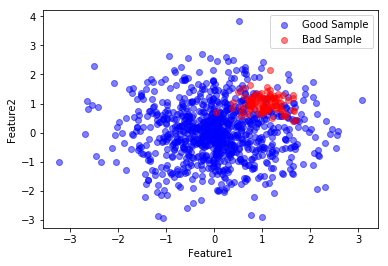

In [55]:
#model = LogisticRegression()
model = LogisticRegression(solver='liblinear',max_iter=1000, random_state=42,multi_class='ovr', C=1)
model.fit(X, y)
prediction = model.predict(X)
print('Accuracy:%.2f'%model.score(X, y))
color = "br"
label = ['Good Sample', 'Bad Sample']
#color = [color[prediction[i]] for i in range(len(y))]
#label = [label[prediction[i]] for i in range(len(y))]
for i in range(2):
    plt.scatter(X[y==i][:,0],X[y==i][:,1],c=color[i],label=label[i],alpha=.5)
plt.legend()    
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()

### predict_proba

In [ ]:
print(model.predict_proba(X)[:,1])

In [ ]:
threshold = 0.5
predicted = (model.predict_proba(X)[:,1]>=threshold).astype(int)
print(predicted)

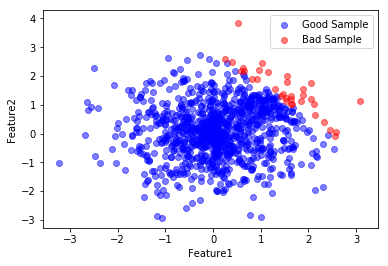

In [67]:
#model = LogisticRegression()
model = LogisticRegression(solver='liblinear',max_iter=1000, random_state=42,multi_class='ovr', C=1)
model.fit(X, y)
threshold = 0.5
predicted = (model.predict_proba(X)[:,1]>=threshold).astype(int)
color = "br"
label = ['Good Sample', 'Bad Sample']
for i in range(2):
    plt.scatter(X[predicted==i][:,0],X[predicted==i][:,1],c=color[i],label=label[i],alpha=.5)
plt.legend()    
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()

    TPR       FPR  PRECISION  RECALL
0  0.00  0.100301   0.000000    0.00
1  0.00  0.100908   0.000000    0.00
2  0.02  0.099391   0.142857    0.02
3  0.05  0.098344   0.147059    0.05
4  0.54  0.052632   0.428571    0.54
5  0.99  0.001420   0.334459    0.99


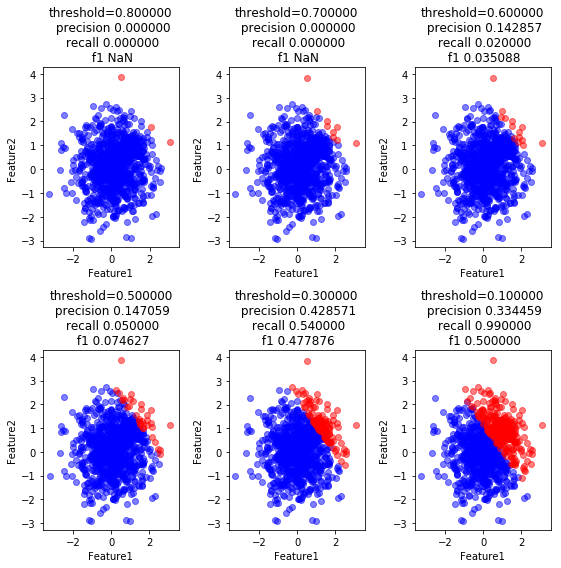

In [132]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']  = 8,8
def different_threshold(drawflag, X, threshold):
    plt.subplot(drawflag)
    plt.tight_layout()
    color = "br"
    label = ['Good Sample', 'Bad Sample']
    predicted = (model.predict_proba(X)[:,1]>=threshold).astype(int)
    # 先算出 confusion matrix 再算出其他評估值
    confusion_matrix = metrics.confusion_matrix(y, predicted)
    #             PredNeg | PredPos
    #  True Neg |   TN    |  FP
    #  True Pos |   FN    |  TP
    true_positive_rate = confusion_matrix[1][1]/confusion_matrix.sum(axis=1)[1]
    false_positive_rate = confusion_matrix[1][0]/confusion_matrix.sum(axis=0)[0]
    # TP / (FP+TP)
    precision = confusion_matrix[1][1]/confusion_matrix.sum(axis=0)[1]
    # TP / (FN+TP)
    recall = true_positive_rate
    for i in range(2):
        plt.scatter(X[predicted==i][:,0],X[predicted==i][:,1],c=color[i],label=label[i],alpha=.5)
    #plt.legend()
    if (precision+recall):
        f1_score = 2*(precision*recall)/(precision+recall)
        plt.title('threshold=%f'%threshold+'\n precision %f'%precision+'\n recall %f'%recall+'\n f1 %f'%f1_score)
    else:    
        plt.title('threshold=%f'%threshold+'\n precision %f'%precision+'\n recall %f'%recall+'\n f1 NaN')
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')
    return true_positive_rate,false_positive_rate, precision, recall

#model = LogisticRegression()
model = LogisticRegression(solver='liblinear',max_iter=1000, random_state=42,multi_class='ovr', C=1)
model.fit(X, y)
logistic_result = pd.DataFrame(columns=['TPR','FPR','PRECISION','RECALL'])
logistic_result.loc[logistic_result.shape[0]] = different_threshold(231,X,0.8)
logistic_result.loc[logistic_result.shape[0]] = different_threshold(232,X,0.7)
logistic_result.loc[logistic_result.shape[0]] = different_threshold(233,X,0.6)
logistic_result.loc[logistic_result.shape[0]] = different_threshold(234,X,0.5)
logistic_result.loc[logistic_result.shape[0]] = different_threshold(235,X,0.3)
logistic_result.loc[logistic_result.shape[0]] = different_threshold(236,X,0.1)
print(logistic_result)
plt.show()

### AUC
ROC curve [TPR vs FPR]

# SVC

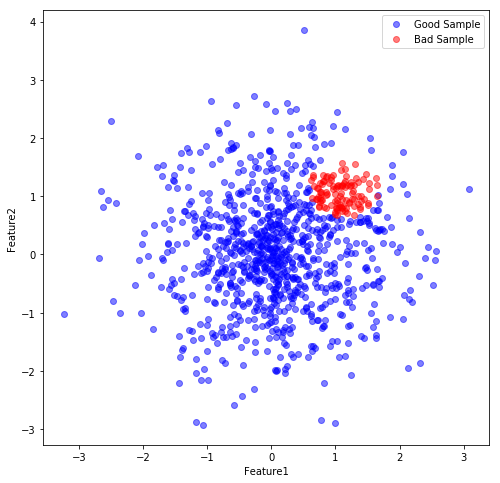

    TPR       FPR  PRECISION  RECALL
0  0.32  0.070613   0.864865    0.32
1  0.57  0.046187   0.826087    0.57
2  0.72  0.030769   0.800000    0.72
3  0.79  0.023490   0.745283    0.79
4  0.85  0.017281   0.643939    0.85
5  0.94  0.007238   0.549708    0.94


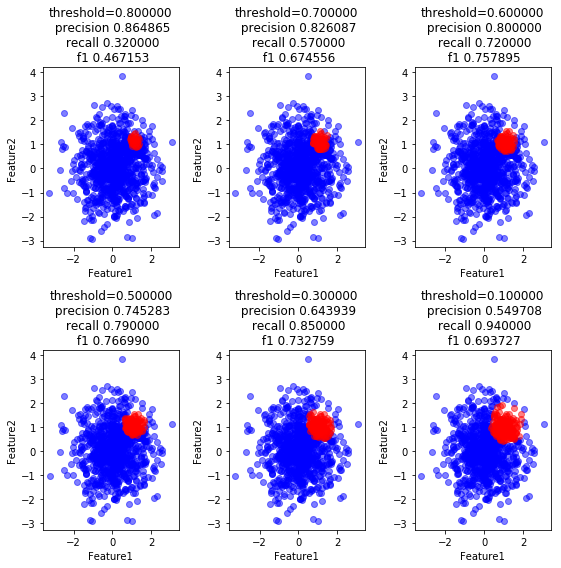

In [129]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', probability= True, gamma='auto')
model.fit(X, y)
threshold = 0.5
predicted = (model.predict_proba(X)[:,1]>=threshold).astype(int)
color = "br"
label = ['Good Sample', 'Bad Sample']
for i in range(2):
    plt.scatter(X[predicted==i][:,0],X[predicted==i][:,1],c=color[i],label=label[i],alpha=.5)
plt.legend()    
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()

svm_result = pd.DataFrame(columns=['TPR','FPR','PRECISION','RECALL'])
svm_result.loc[svm_result.shape[0]] = different_threshold(231,X,0.8)
svm_result.loc[svm_result.shape[0]] = different_threshold(232,X,0.7)
svm_result.loc[svm_result.shape[0]] = different_threshold(233,X,0.6)
svm_result.loc[svm_result.shape[0]] = different_threshold(234,X,0.5)
svm_result.loc[svm_result.shape[0]] = different_threshold(235,X,0.3)
svm_result.loc[svm_result.shape[0]] = different_threshold(236,X,0.1)
print(svm_result)
plt.show()

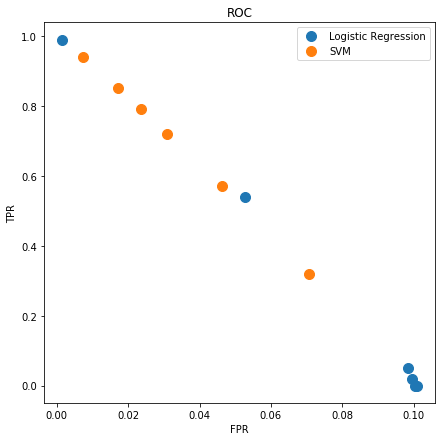

In [130]:
plt.figure(figsize=(7, 7))
plt.plot(logistic_result['FPR'], logistic_result['TPR'], '.', label = 'Logistic Regression', markersize=20)
plt.plot(svm_result['FPR'], svm_result['TPR'], '.', label = 'SVM', markersize=20)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.title('ROC')
plt.show()

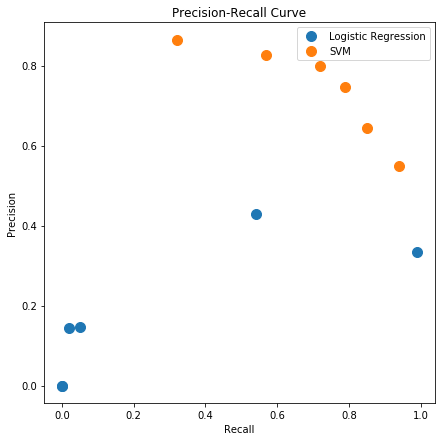

In [131]:
plt.figure(figsize=(7, 7))
plt.plot(logistic_result['RECALL'], logistic_result['PRECISION'], '.', label = 'Logistic Regression', markersize=20)
plt.plot(svm_result['RECALL'], svm_result['PRECISION'], '.', label = 'SVM', markersize=20)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision-Recall Curve')
plt.show()